<a href="https://colab.research.google.com/github/Areliortiz/SIMULACION2/blob/main/Metropolis_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Metropolis-Hastings 1D**

In [83]:
import numpy as np
import matplotlib.pyplot as plt

1.   Exponencial
2.   Weibull
3.   Cauchy

# *1. Distribución exponencial*
Aproximaremos la distribución exponencial con el método de metropolis.

Funcion de densidad: $f(x) = λe^{-λx}$

Parametro $λ>0$

In [84]:
#funcion de densidad
def exp(x_1,lamda):
  return lamda*np.exp(-lamda*x_1)

In [85]:
#parametros de la función
lamda = 0.5
delta=0.1  # Entre mas grande sea delta la aceptación es menor


In [86]:
n_exponencial = 80000  # Número de iteraciones
x_1 = np.zeros(n_exponencial)  # Vector para los valores generados
x_1[0] = 2
acept_1 = 0

# Algoritmo Metropolis-Hastings
for i in range(0, n_exponencial-1):
    y_1 = x_1[i] + np.random.uniform(-delta, delta)
    if y_1 >= 0:  # Solo aceptar valores no negativos
        if np.random.rand() < min(1, exp(y_1, lamda) / exp(x_1[i], lamda)):
            x_1[i+1] = y_1
            acept_1 += 1
        else:
            x_1[i+1] = x_1[i]
    else:
        x_1[i+1] = x_1[i]
print("La aceptación fue del", acept_1/n_exponencial*100, "%")


La aceptación fue del 97.20875 %


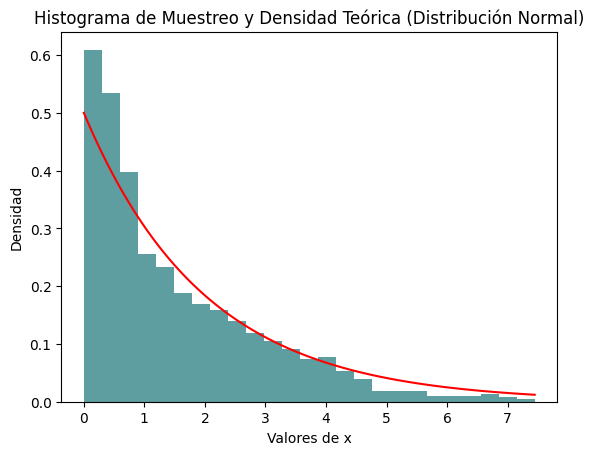

In [87]:
plt.hist(x_1,density=True,color='cadetblue',bins=25)
xs=np.linspace(min(x_1),max(x_1),100)   # Defiminos los límites de nuestra gráfica
plt.plot(xs,exp(xs,lamda),color='red')
plt.xlabel('Valores de x')
plt.ylabel('Densidad')
plt.title('Histograma de Muestreo y Densidad Teórica (Distribución Normal)')
plt.show()

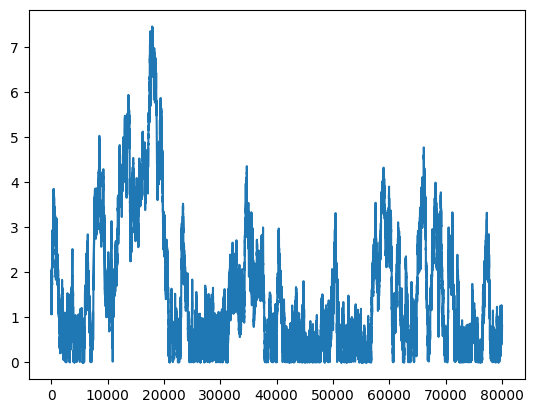

In [88]:
plt.plot(x_1)

> ***Media y Varianza***

Media(μ):	$\frac{1}{λ}$

Varianza $(σ^2)$ :	$\frac{1}{λ^2}$

Desviacion estandar(σ):$\sqrt{σ^2} \\ $

Como λ = 0.5, entonces:

Media(μ)= $\frac{1}{0.5}$=2

Varianza $(σ^2)$ :	$\frac{1}{0.5^2} = 4$

Desviacion estandar(σ):$\sqrt{4} = 2$





Media: 1.54
Varianza: 2.07
Desviación: 1.44


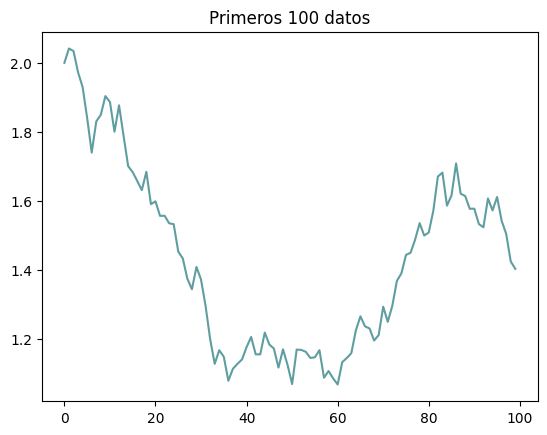

In [89]:
# Media y varianza
media = np.mean(x_1)
varianza = np.var(x_1)
desv = np.std(x_1)
print(f"Media: {media:.2f}")
print(f"Varianza: {varianza:.2f}")
print(f"Desviación: {desv:.2f}")

# Observamos el comportamiento que tienen nuestra muestra generada
plt.plot(x_1[0:100],color='cadetblue') # Primeros 100 datos
plt.title('Primeros 100 datos')
plt.show()

# *2. Distribución Weibull*
Aproximaremos la distribución exponencial con el método de metropolis.

Funcion de densidad: $ f(x,λ,α)=λα(λx)^{α−1}$ $e^{-(λx)^α}$

Parametros:


*   $λ>0$
*   $α>0$




In [90]:
#funcion de densidad
def weibull(x,lamda,alpha):
  return lamda*alpha*(lamda*x)**(alpha-1)*np.exp(-(lamda*x)**alpha)

In [91]:
#parametros de la función
lamda_2 = 0.5
alpha_2=2
delta_2=0.2  # Entre mas grande sea delta la aceptación es menor


In [92]:
n_weibull = 80000  # Número de iteraciones
x_2 = np.zeros(n_weibull)  # Vector para los valores generados
x_2[0] = 2
acept_2 = 0

# Algoritmo Metropolis-Hastings
for i in range(0, n_weibull-1):
    y_2 = x_2[i] + np.random.uniform(-delta_2, delta_2)
    if y_2 >= 0:  # Solo aceptar valores no negativos
        if np.random.rand() < min(1, weibull(y_2, lamda,alpha_2) / weibull(x_2[i], lamda,alpha_2)):
            x_2[i+1] = y_2
            acept_2 += 1
        else:
            x_2[i+1] = x_2[i]
    else:
        x_2[i+1] = x_2[i]
print("La aceptación fue del", acept_1/n_exponencial*100, "%")

La aceptación fue del 97.20875 %


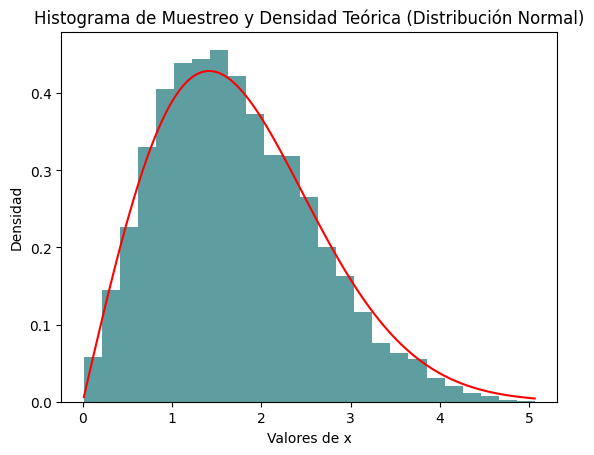

In [93]:
plt.hist(x_2,density=True,color='cadetblue',bins=25)
xs_2=np.linspace(min(x_2),max(x_2),100)   # Defiminos los límites de nuestra gráfica
plt.plot(xs_2,weibull(xs_2,lamda_2,alpha_2),color='red')
plt.xlabel('Valores de x')
plt.ylabel('Densidad')
plt.title('Histograma de Muestreo y Densidad Teórica (Distribución Normal)')
plt.show()

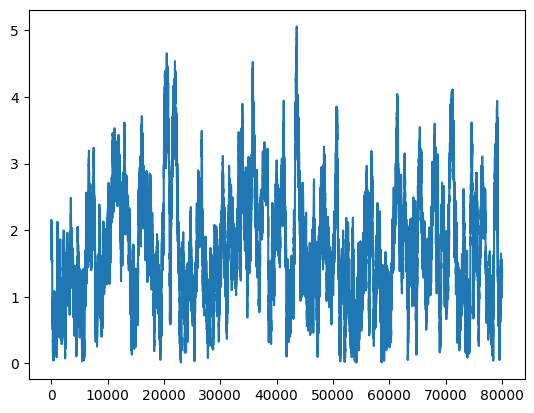

In [94]:
plt.plot(x_2)

> ***Media y Varianza***

La media $(μ)$ y la varianza $(σ^2)$ de la distribución Weibull están dadas por las siguientes fórmulas:

Media(μ)	$ = λ \cdot Γ(1 + \frac{1}{α})$

Varianza $(σ^2)$ = $\frac{1}{ λ^2} [Γ (1 + \frac{2}{α}) - Γ^2(1 + \frac{1}{α})]$

Desviacion estandar(σ):$\sqrt{σ^2} \\ $

Como λ = 0.5 y α =2, entonces:


In [ ]:
# Cálculo de los valores teóricos para comparar
media_teorica = (1 / lamda_2) * sp.gamma(1 + 1 / alpha_2)
varianza_teorica = (1 / lamda_2**2) * (sp.gamma(1 + 2 / alpha_2) - (sp.gamma(1 + 1 / alpha_2))**2)
desv_teorica = varianza_teorica**0.5

In [100]:
print(f"Media teórica: {media_teorica:.2f}")
print(f"Varianza teórica: {varianza_teorica:.2f}")
print(f"Desviación teórica: {desv_teorica:.2f}")


Media teórica: 1.77
Varianza teórica: 0.86
Desviación teórica: 0.93


Media: 1.77
Varianza: 0.86
Desviación: 0.93


Text(0.5, 1.0, 'Primeros 100 datos')

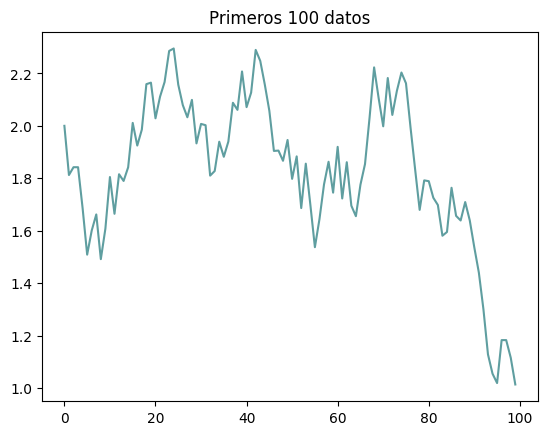

In [101]:
# Media y varianza
media_2 = np.mean(x_2)
varianza_2 = np.var(x_2)
desv_2 = np.std(x_2)
print(f"Media: {media_2:.2f}")
print(f"Varianza: {varianza_2:.2f}")
print(f"Desviación: {desv_2:.2f}")

# Observamos el comportamiento que tienen nuestra muestra generada
plt.plot(x_2[0:100],color='cadetblue') # Primeros 100 datos
plt.title('Primeros 100 datos')

# *1. Distribución de Cauchy*
Aproximaremos la distribución exponencial con el método de metropolis.

Funcion de densidad: $f(x) = λe^{-λx}$

Parametro $λ>0$

In [106]:
def f(x,gamma,x0):
  return 1/((np.pi*gamma)*(1+((x-x0)/gamma)**2))

In [109]:
# Parametros que cambian
x_3 = 0.2
gamma_3 = 0.1
delta_3 = 0.5

In [110]:
n = 50000  # n tiene que ser muy grande
x_3 = np.zeros(n)
x_3[0] = 0  # Valor inicial
acept = 0.1

for i in range(0,n-1):
  y = x_3[i] + np.random.uniform(-delta_3,delta_3)
  if np.random.rand()<min(1,f(y,gamma_3,x_3)/f(x_3[i],gamma_3,x_3)):
    x_3[i+1]=y
    acept += 1
  else:
    x_3[i+1] = x_3[i]
print("La aceptacion fue del", acept/n*100,"%")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Text(0.5, 1.0, 'Distribución de Cauchy')

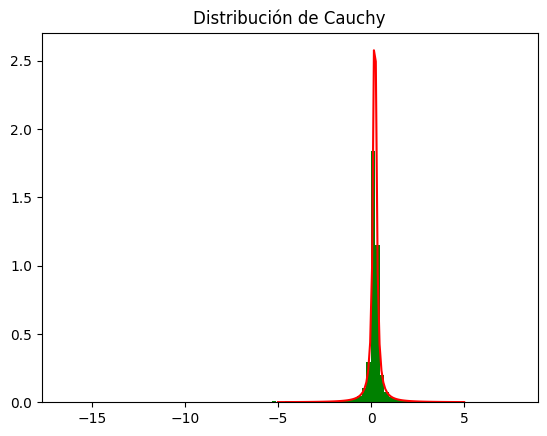

In [65]:
plt.hist(x,density = True, bins=100, color='green')
xs = np.linspace(-5,5,100)
plt.plot(xs,f(xs,gamma,x0), color='red')
plt.title('Distribución de Cauchy')

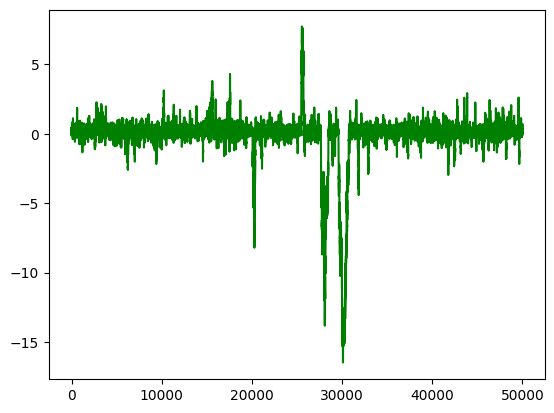

In [66]:
plt.plot(x, color='green')

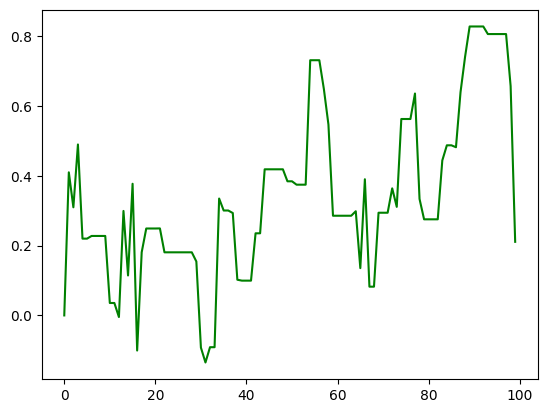

In [67]:
plt.plot(x[:100], color='green')

In [68]:
u=[1,2,3,4,5,6,7,8,9,10]
a=np.var(u)
k=np.std(u)
print(a,k)
r=8.25**-0.5
print(r)

8.25 2.8722813232690143
0.3481553119113957
